In [88]:
import pandas as pd
import numpy as np
import re
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from dateutil import parser
import warnings
warnings.filterwarnings('ignore')

In [89]:
dataset = pd.read_csv ('../test_data/csv2/eth2dump-clean-6h_1.csv')
dataset = dataset[(dataset['MAC Source']=='00:0c:29:e6:14:0d') | (dataset['MAC Source']=='00:0c:29:9d:9e:9e') | (dataset['MAC Source']=='48:5b:39:64:40:79') | (dataset['MAC Source']=='00:80:f4:09:51:3b')]

dataset

,No.,MAC Source,MAC Destination,Source,Destination,Source Port,Destination Port,Protocol,Length,Epoch Time,Delta Time
0,1,00:0c:29:9d:9e:9e,00:80:f4:09:51:3b,172.27.224.70,172.27.224.250,49205.0,502.0,eth:ethertype:ip:tcp:mbtcp:modbus,66,2018-09-08 18:14:04.978565,0.000000
1,2,00:80:f4:09:51:3b,00:0c:29:9d:9e:9e,172.27.224.250,172.27.224.70,502.0,49205.0,eth:ethertype:ip:tcp:mbtcp:modbus,85,2018-09-08 18:14:04.983449,0.004884
2,3,48:5b:39:64:40:79,00:80:f4:09:51:3b,172.27.224.251,172.27.224.250,58944.0,502.0,eth:ethertype:ip:tcp,60,2018-09-08 18:14:05.016492,0.033043
3,4,00:0c:29:9d:9e:9e,00:80:f4:09:51:3b,172.27.224.70,172.27.224.250,49205.0,502.0,eth:ethertype:ip:tcp,60,2018-09-08 18:14:05.196024,0.179532
4,5,00:0c:29:9d:9e:9e,00:80:f4:09:51:3b,172.27.224.70,172.27.224.250,49205.0,502.0,eth:ethertype:ip:tcp:mbtcp:modbus,66,2018-09-08 18:14:05.290288,0.094264
...,...,...,...,...,...,...,...,...,...,...,...
427836,427837,00:0c:29:9d:9e:9e,00:80:f4:09:51:3b,172.27.224.70,172.27.224.250,49205.0,502.0,eth:ethertype:ip:tcp:mbtcp:modbus,66,2018-09-09 00:14:03.618507,0.109876
427837,427838,00:80:f4:09:51:3b,00:0c:29:9d:9e:9e,172.27.224.250,172.27.224.70,502.0,49205.0,eth:ethertype:ip:tcp:mbtcp:modbus,85,2018-09-09 00:14:03.629414,0.010907
427838,427839,00:0c:29:9d:9e:9e,00:80:f4:09:51:3b,172.27.224.70,172.27.224.250,49205.0,502.0,eth:ethertype:ip:tcp,60,2018-09-09 00:14:03.836240,0.206826
427839,427840,00:0c:29:9d:9e:9e,00:80:f4:09:51:3b,172.27.224.70,172.27.224.250,49205.0,502.0,eth:ethertype:ip:tcp:mbtcp:modbus,66,2018-09-09 00:14:03.930763,0.094523


In [90]:
regex = "^((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])\.){3}(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9]?[0-9])$"

def check(Ip):
     
    # pass the regular expression
    # and the string in search() method
    if(re.search(regex, Ip)):
        return True
    else:
        return False

In [91]:
def previous_ip_time(i):
    global dataset
    i-=1
    current_ip = dataset.loc[i]['Source']
    j = i-1
    if j == -1:
        return dataset.loc[i]['Time']

    while(current_ip != dataset.loc[j]['Source']):
        j -= 1
        if j == -1:
            return 0.0
    
    idx_delta = i-j
    return dataset.loc[i-idx_delta]['Time']


In [92]:
# creates dataframe array grouped by ip address
# dataset = dataset[(dataset['MAC Source']=='00:0c:29:e6:14:0d') | (dataset['MAC Source']=='00:0c:29:9d:9e:9e') | (dataset['MAC Source']=='48:5b:39:64:40:79') | (dataset['MAC Source']=='00:80:f4:09:51:3b')]
distinct = dataset['MAC Source'].unique()
grouped_ip = dataset.groupby(dataset['MAC Source'])
ip_arr_df = [grouped_ip.get_group(d) for d in distinct]
grouped_ip.groups.keys()

dict_keys(['00:0c:29:9d:9e:9e', '00:80:f4:09:51:3b', '48:5b:39:64:40:79'])

In [93]:
dataset['Epoch Time'] = pd.to_datetime(dataset['Epoch Time'], errors='coerce')
packets_per_sec = dataset.set_index('Epoch Time').groupby(pd.Grouper(freq='1S'))['No.'].count()
#vars(bytes_per_sec.index)
packets_per_sec

Epoch Time
2018-09-08 18:14:04     2
2018-09-08 18:14:05    10
2018-09-08 18:14:06    15
2018-09-08 18:14:07    30
2018-09-08 18:14:08    10
                       ..
2018-09-09 00:13:59     9
2018-09-09 00:14:00    30
2018-09-09 00:14:01    16
2018-09-09 00:14:02    11
2018-09-09 00:14:03    30
Freq: S, Name: No., Length: 21600, dtype: int64

['00:0c:29:9d:9e:9e']
['00:80:f4:09:51:3b']
['48:5b:39:64:40:79']


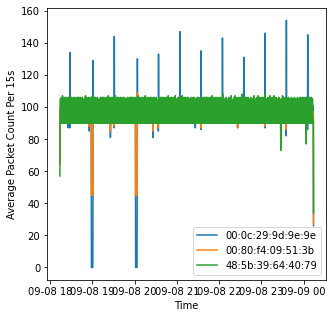

In [104]:
pyplot.rcParams["figure.figsize"] = (5,5)
for df in ip_arr_df:
    #df[df['Protocol']=='TCP']
    print(df['MAC Source'].unique())
    name = df['MAC Source'].unique()[0]
    df['Epoch Time'] = pd.to_datetime(df['Epoch Time'], errors='coerce')
    packets_per_sec = df.set_index('Epoch Time').groupby(pd.Grouper(freq='15s'))['No.'].count()
    pyplot.plot(packets_per_sec.index, packets_per_sec, label=name) 
    
    # pyplot.plot(df['No.'], df['Delta Time']) 
    # print(df.groupby(['Source Port', 'Destination Port']).size())
    # fig, ax = pyplot.subplots()
    # ax.scatter(df['Time'], df['Delta Time']) #c=dataset['Source'].map(colors)
    # pyplot.show()
    # print(df['Source'].unique())

    # fig, ax = pyplot.subplots()
    # ax.scatter(packets_per_sec.index, packets_per_sec) #c=dataset['Source'].map(colors)
 
    # pyplot.show()
pyplot.xlabel('Time')
pyplot.ylabel('Average Packet Count Per 15s')
pyplot.legend()
pyplot.show()
    # df['Protocol'].value_counts().plot.bar()
    # df['Protocol'].value_counts().plot.pie()

    # pyplot.show()
    #CLEAN

In [102]:
type(packets_per_sec.index[0])

pandas._libs.tslibs.timestamps.Timestamp